In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [2]:
with open("output_metrics_1.pickle", "rb") as f:
    answer = pickle.load(f)


/home/anna/.local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator KMeans from version 1.1.3 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
answer.keys() #(window_size, N_clusters)

dict_keys([(5, 7), (5, 9), (5, 11), (10, 7), (10, 9), (10, 11), (15, 7), (15, 9), (15, 11)])

In [4]:
contents = answer[list(answer.keys())[0]][0].split()
contents = {x:i for i, x in enumerate(contents)}
contents

{'str': 0,
 'cluster_metrics': 1,
 'clusters_model': 2,
 'metrics': 3,
 'clusters_sizes': 4,
 'weighted_mase': 5,
 'weighted_mape': 6}

In [5]:
Ns_clusters = np.unique([key[1] for key in answer])
window_sizes = np.unique([key[0] for key in answer])
Ns_clusters, window_sizes

(array([ 7,  9, 11]), array([ 5, 10, 15]))

**Кластеризация** 

Davies–Bouldin Index

In [15]:
# for key, value in answer.items():
#     print(f"{value[contents['cluster_metrics']]['DB']:.3f} - {key}")

In [16]:
a = [[value[contents['cluster_metrics']]["DB"] for key, value in answer.items() if key[0] == W] for W in window_sizes]


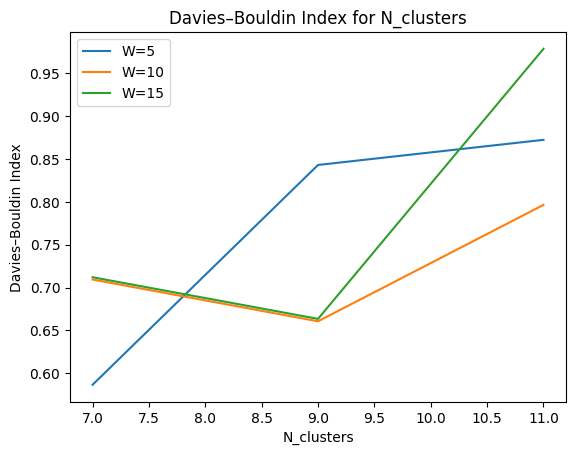

In [17]:
for i in range(len(a)):
    plt.plot(Ns_clusters, a[i], label="W="+str(window_sizes[i]))
plt.title("Davies–Bouldin Index for N_clusters")
plt.xlabel("N_clusters")
plt.ylabel("Davies–Bouldin Index")
plt.legend()
plt.show()

In [18]:
a = [[value[contents['cluster_metrics']]["DB"] for key, value in answer.items() if key[1] == C] for C in Ns_clusters]


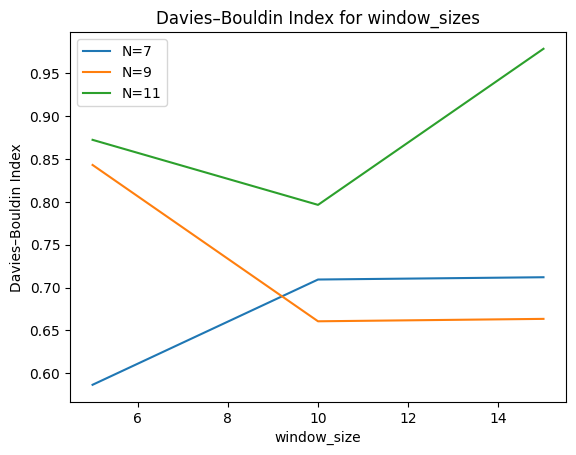

In [19]:
for i in range(len(a)):
    plt.plot(window_sizes, a[i], label="N="+str(Ns_clusters[i]))
plt.legend()
plt.title("Davies–Bouldin Index for window_sizes")
plt.xlabel("window_size")
plt.ylabel("Davies–Bouldin Index")
plt.show()

**MAPE**

/home/anna/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


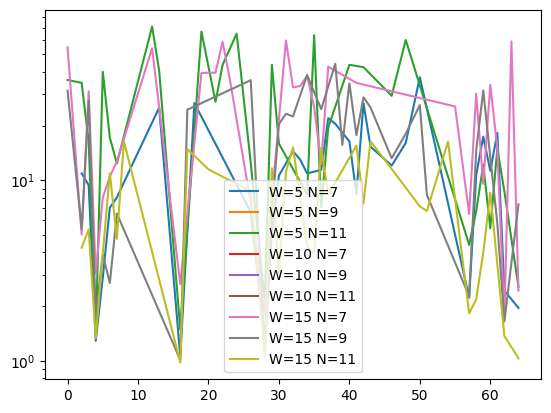

In [20]:
# a = answer[(15, 11)][contents['weighted_mape']]
for key, value in answer.items():
    a = value[contents['weighted_mape']]
    mask = (a <= np.percentile(a, 50))
    plt.yscale("log")
    plt.plot(np.arange(a.shape[0])[mask], a[mask], label="W="+str(key[0])+" N="+str(key[1]))
plt.legend()
# plt.plot(a[a <= np.percentile(a, 100)])
plt.show()

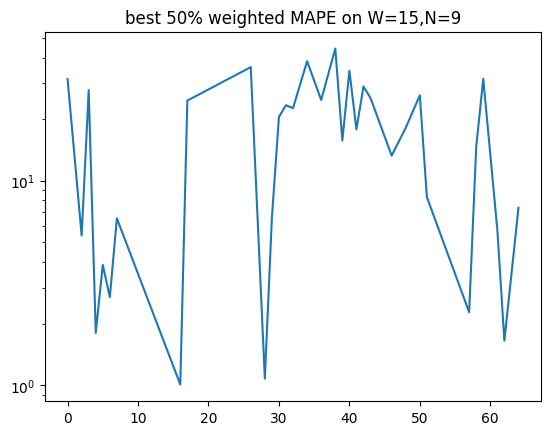

In [24]:
a = answer[(15,9)][contents['weighted_mape']]
mask = (a <= np.percentile(a, 50))
plt.yscale("log")
plt.plot(np.arange(a.shape[0])[mask], a[mask], label="W="+str(key[0])+" N="+str(key[1]))
plt.title("best 50% weighted MAPE on W=15,N=9")
plt.show()

In [25]:
answer.keys()

dict_keys([(5, 7), (5, 9), (5, 11), (10, 7), (10, 9), (10, 11), (15, 7), (15, 9), (15, 11)])

[ 5 10 15]
(3, 65)
(65,)
(3, 65)
(65,)
(3, 65)
(65,)


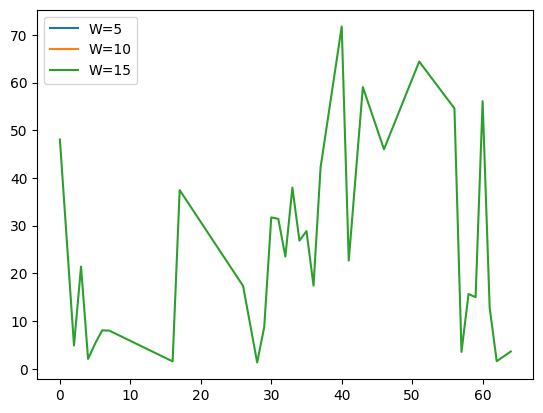

In [36]:
# a = [[value[contents['weighted_mape']] for key, value in answer.items() if key[0] == W] for W in window_sizes]
print(window_sizes)
for i in range(len(window_sizes)):
#     print(*a[i])
    a = np.array([value[contents['weighted_mape']] for key, value in answer.items() if key[0] == window_sizes[i]])
    print(a.shape)
    a = np.mean(a, axis=0) 
    print(a.shape)
    mask = (a <= np.percentile(a, 50))
    plt.plot(np.arange(a.shape[0])[mask], a[mask], label="W="+str(window_sizes[i]))
plt.legend()
plt.show()


**MASE**


In [7]:
contents

{'str': 0,
 'cluster_metrics': 1,
 'clusters_model': 2,
 'metrics': 3,
 'clusters_sizes': 4,
 'weighted_mase': 5,
 'weighted_mape': 6}

Прогноз по кластерам

In [16]:
answer[(15, 9)][contents['metrics']][0].keys()

dict_keys(['mae', 'mape', 'mase'])

In [ ]:
for w in window_sizes:
    for n in Ns_clusters:
        maes = np.array([answer[(w, n)][contents['metrics']][cluster_num]['mae'] for cluster_num in range(n)])
        #Как тебя сводить во что-то презентабельное?

In [25]:
for w in window_sizes:
    for n in Ns_clusters:
        for cluster_num in range(n):
            tmp_metrics = answer[(w, n)][contents['metrics']][cluster_num]
            plt.plot(tmp_metrics['mase'])
            plt.yscale("log")
            plt.title(f"MASE: N={n}, W={w}, {cluster_num=}")
            plt.xlabel("features")
            plt.ylabel("metric")
            plt.savefig(f"plots/MASE/N={n}, W={w}, {cluster_num=}")
            plt.clf()

<Figure size 640x480 with 0 Axes>

In [26]:
for w in window_sizes:
    for n in Ns_clusters:
        for cluster_num in range(n):
            tmp_metrics = answer[(w, n)][contents['metrics']][cluster_num]
            plt.plot(tmp_metrics['mae'])
            plt.yscale("log")
            plt.title(f"MAE: N={n}, W={w}, {cluster_num=}")
            plt.xlabel("features")
            plt.ylabel("metric")
            plt.savefig(f"plots/MAE/N={n}, W={w}, {cluster_num=}")
            plt.clf()

<Figure size 640x480 with 0 Axes>

/home/anna/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


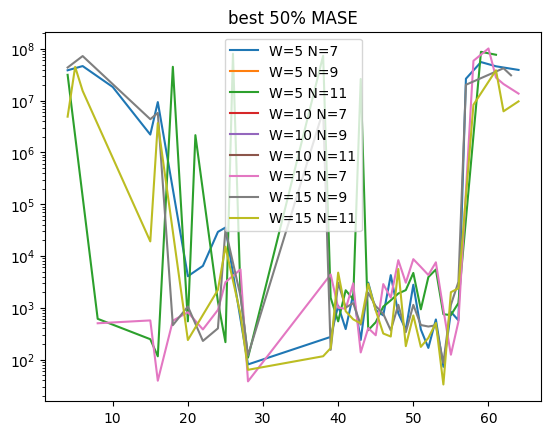

In [38]:
for key, value in answer.items():
    a = value[contents['weighted_mase']]
    mask = (a <= np.percentile(a, 50))
    plt.yscale("log")
    plt.plot(np.arange(a.shape[0])[mask], a[mask], label="W="+str(key[0])+" N="+str(key[1]))
plt.legend()
plt.title("best 50% MASE")
plt.show()


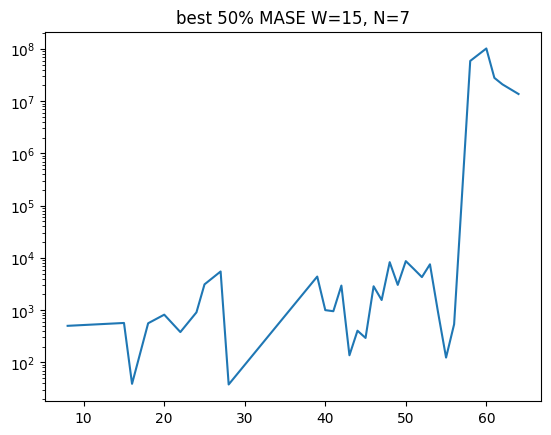

In [44]:
a = answer[(15, 7)][contents['weighted_mase']]
mask = (a <= np.percentile(a, 50))
plt.yscale("log")
plt.plot(np.arange(a.shape[0])[mask], a[mask], label="W="+str(key[0])+" N="+str(key[1]))
plt.title("best 50% MASE W=15, N=7")
plt.show()

Text(0.5, 1.0, 'MAPE on clusters')

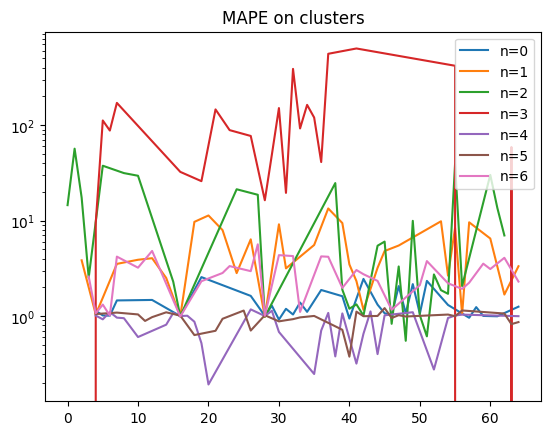

In [54]:
cur_N = 7
cur_W = 15
for n in range(cur_N):
    a = answer[(cur_W, cur_N)][contents['metrics']][n]['mape']
    mask = (a <= np.percentile(a, 50))
    plt.yscale("log")
    plt.plot(np.arange(a.shape[0])[mask], a[mask], label="n="+str(n))
plt.legend()
plt.title("MAPE on clusters")

Text(0.5, 1.0, 'MASE on clusters')

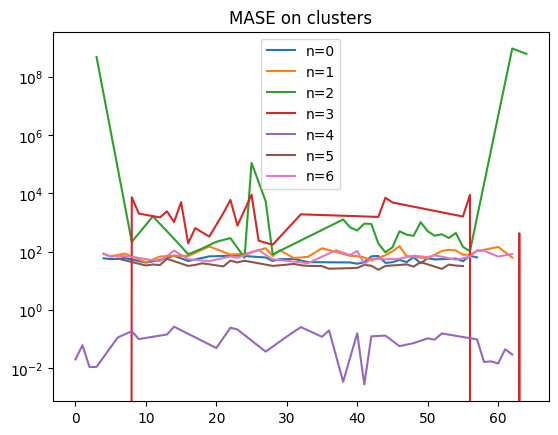

In [58]:
cur_N = 7
cur_W = 15
for n in range(cur_N):
    a = answer[(cur_W, cur_N)][contents['metrics']][n]['mase']
    mask = (a <= np.percentile(a, 50))
    plt.yscale("log")
    plt.plot(np.arange(a.shape[0])[mask], a[mask], label="n="+str(n))
plt.legend()
plt.title("MASE on clusters")

<BarContainer object of 7 artists>

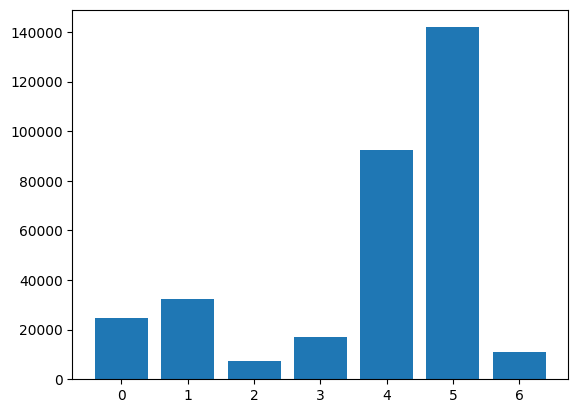

In [62]:
plt.bar(np.arange(cur_N), answer[(cur_W, cur_N)][contents['clusters_sizes']])
